# HSV Pansharpening 

Les étape du *HSV pansharpening* sont :
1) augmenter la résolution de l'image RGB pour qu'elle corresponde à la résolution de l'image panchromatique,
2) passer cette image dans le repère HSV
3) remplacer le channel value (V) par l'image panchromatique
4) repasser en RGB

## Chargement des images

In [1]:
import matplotlib.pyplot as plt
import cv2
import nbimporter
from utils import pansharpening as utils

In [2]:
# path = '../images/landsat_9/lausanne/LC09_L1TP_195028_20220419_20220419_02_T1_' # Lausanne
path = '../images/landsat_9/lyon/LC08_L1TP_196028_20220418_20220427_02_T1_' # Lyon
ext = '.TIF'

In [3]:
bw, ds = utils.load_satellite_images(path, ext)

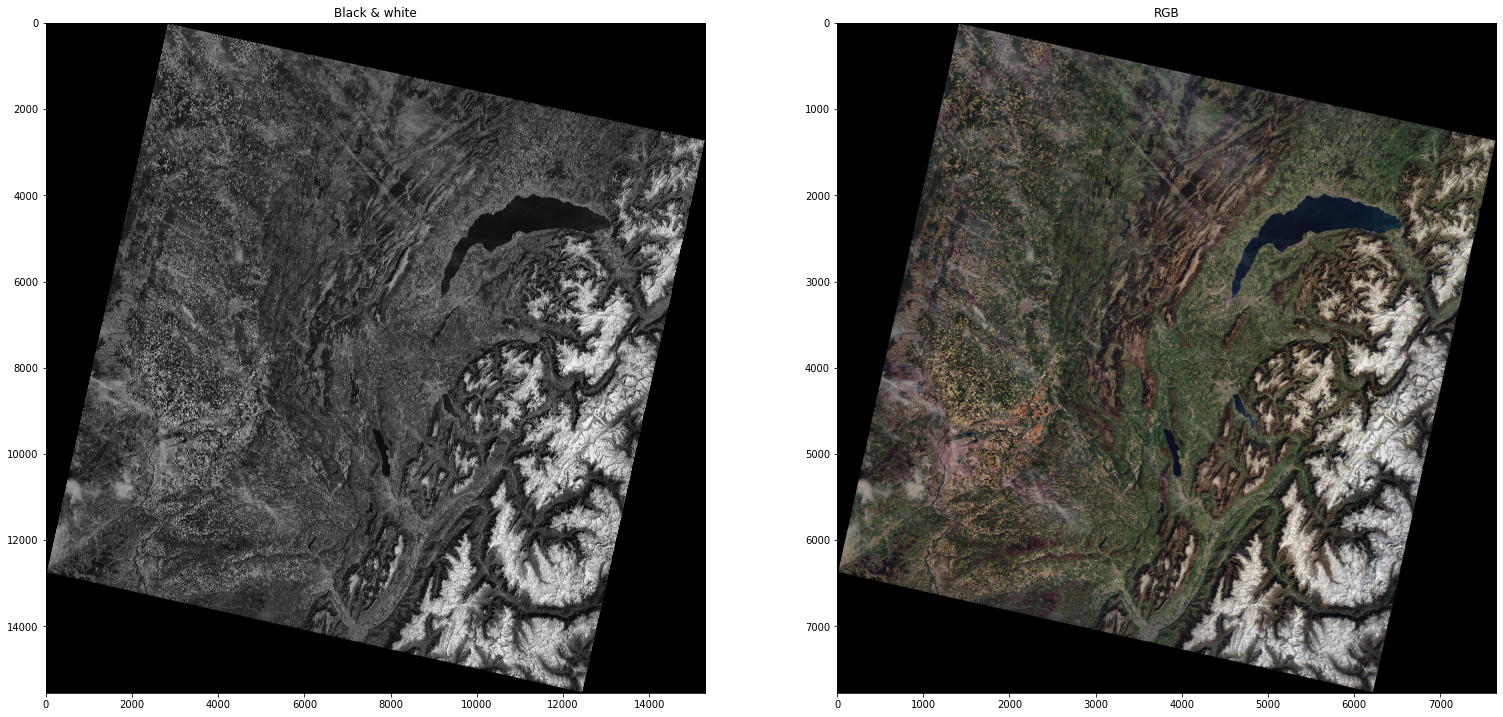

In [4]:
utils.plot_list([bw, ds], ['Black & white', 'RGB'])

## 1. Upsampling

On augmente la résolution de l'image couleur à celle de l'image en niveau de gris.

In [5]:
w, h = bw.shape[1], bw.shape[0]
us = cv2.resize(ds, (w, h))

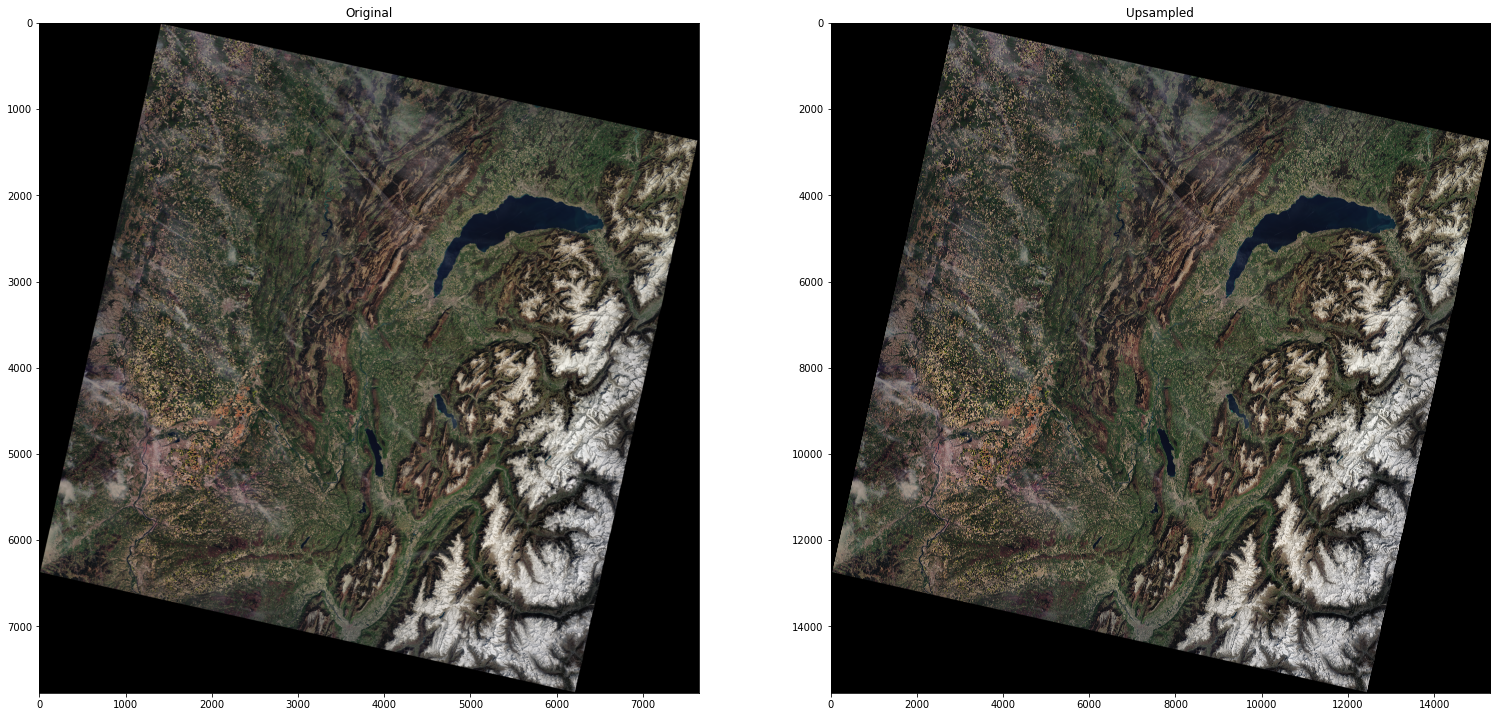

In [6]:
utils.plot_list([ds, us], ['Original', 'Upsampled'])

## 2. To HSV

In [7]:
hsv = cv2.cvtColor(us, cv2.COLOR_RGB2HSV)
v = hsv[:,:,2]

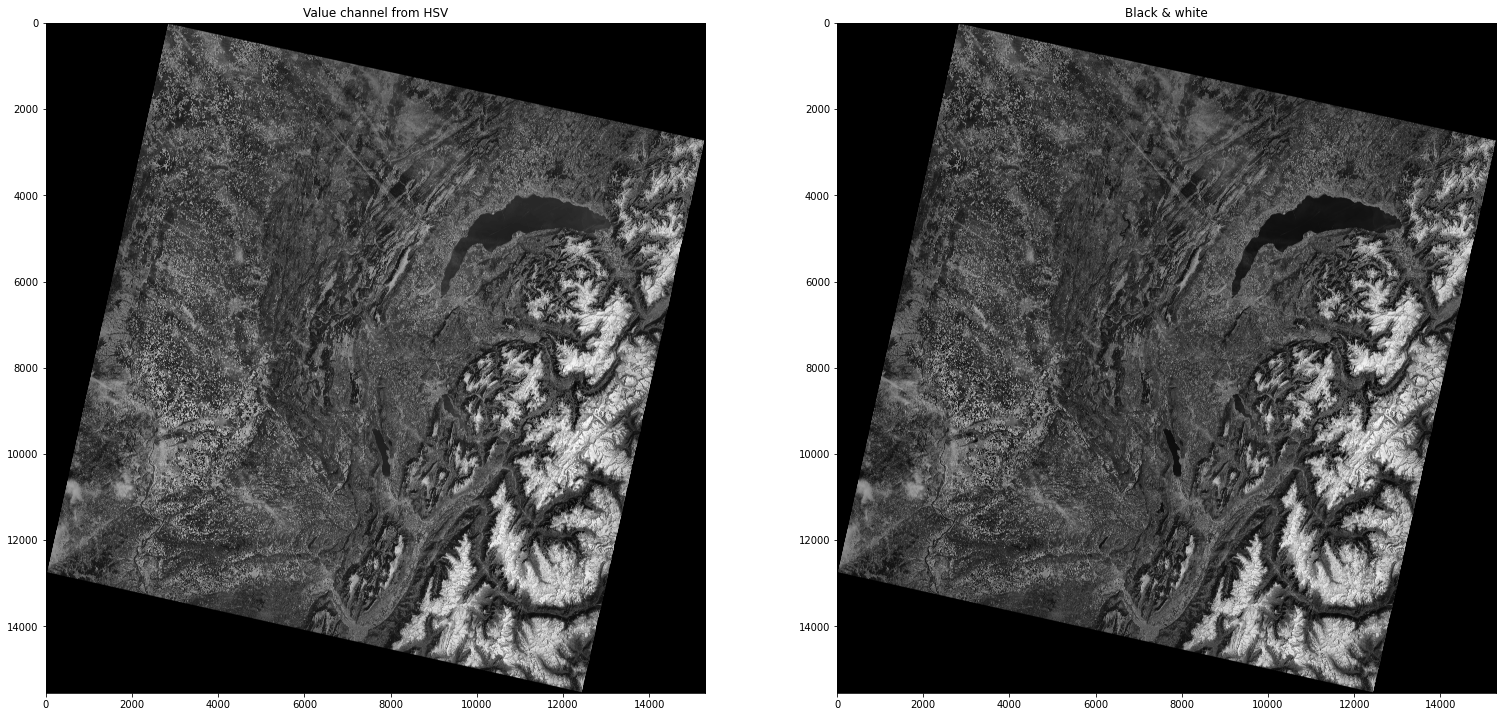

In [8]:
utils.plot_list([v, bw], ['Value channel from HSV', 'Black & white'])

## 3. Remplacer V par l'image panchromatique

In [9]:
hsv[:,:,2] = bw

## 4. From HSV

In [10]:
pansharpened = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

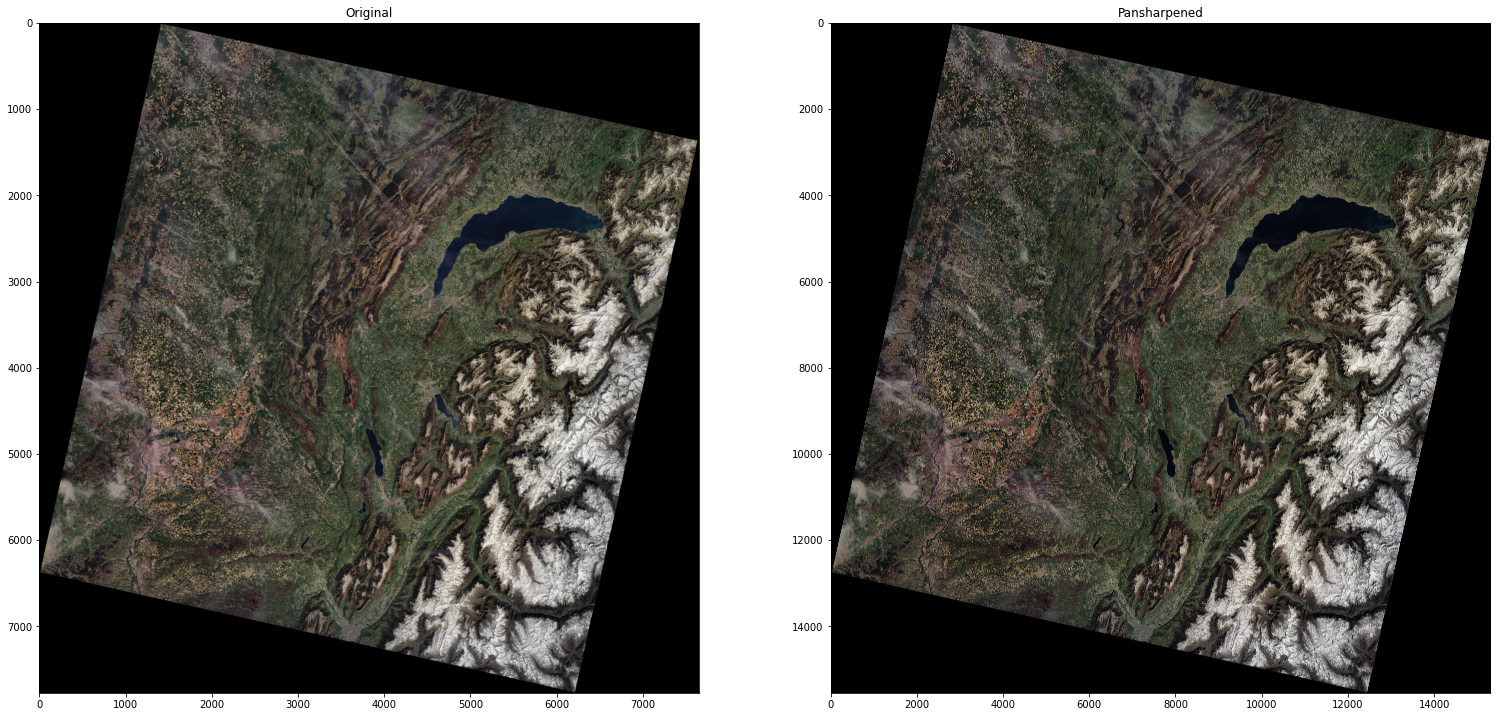

In [11]:
utils.plot_list([ds, pansharpened], ['Original', 'Pansharpened'])

## Save results

In [12]:
cv2.imwrite(path + 'PANSHARPENED' + ext, cv2.cvtColor(pansharpened, cv2.COLOR_RGB2BGR))

True